# New dataset and Using LSTM Model Approach

## Imports


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [4]:
import os

df = pd.read_csv('EEG_Eye_State_Classification.csv')
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


## Data Preprocessing

### Data Insights
    eyeDetection row:
    - 1 indicates the eye-closed
    - 0 the eye-open state.

In [5]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [7]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

<Axes: >

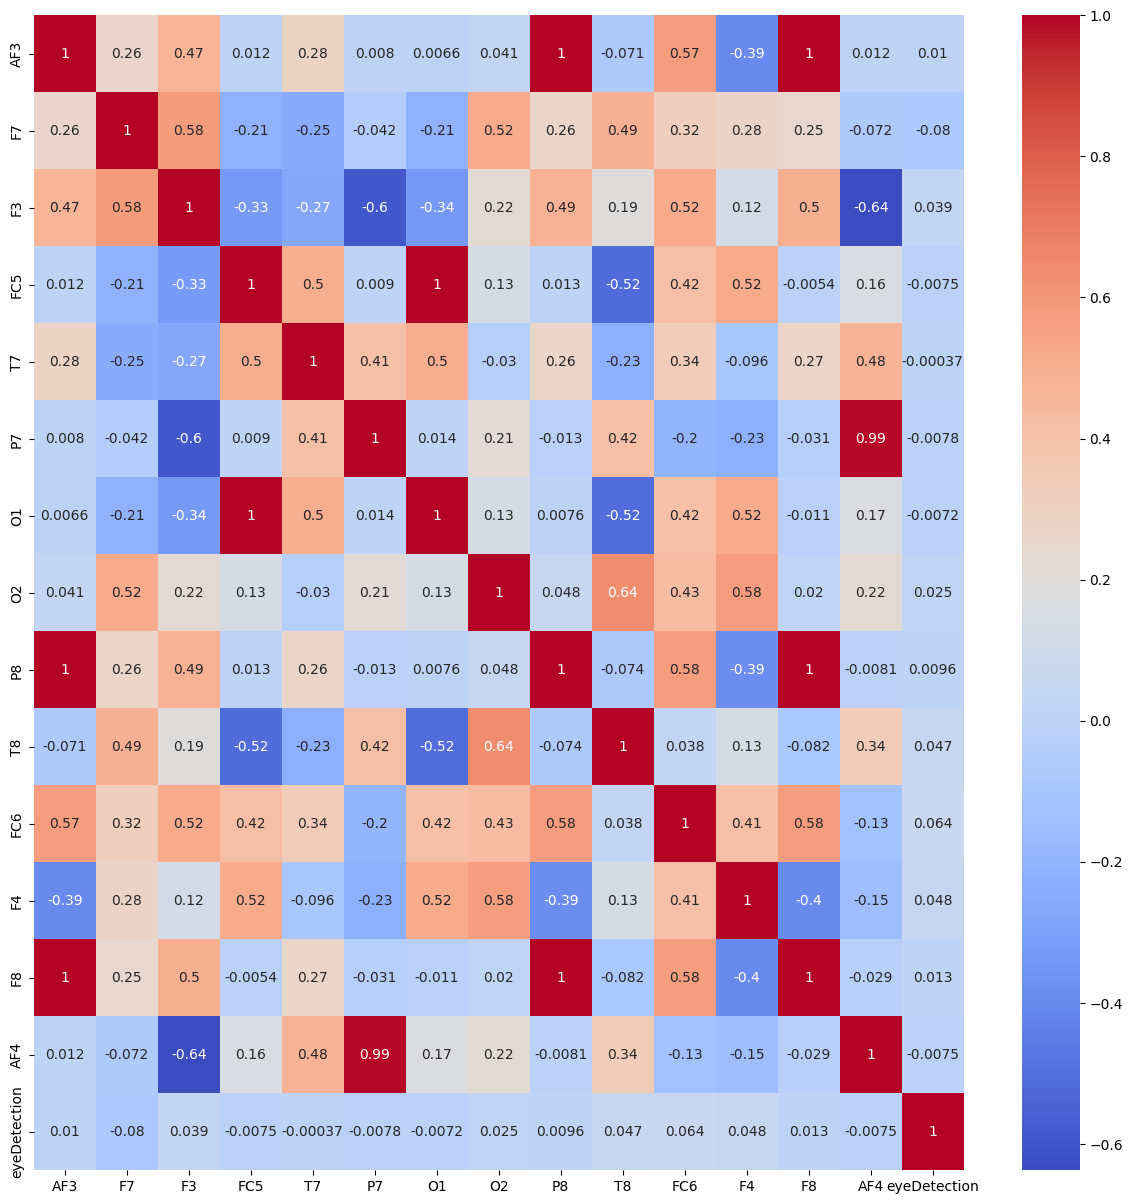

In [8]:
plt.figure(figsize = (15,15))
cor_matrix = df.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')

In [9]:
# Correlation with output variable
cor_target = abs(cor_matrix["eyeDetection"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

F7              0.079994
FC6             0.064294
eyeDetection    1.000000
Name: eyeDetection, dtype: float64

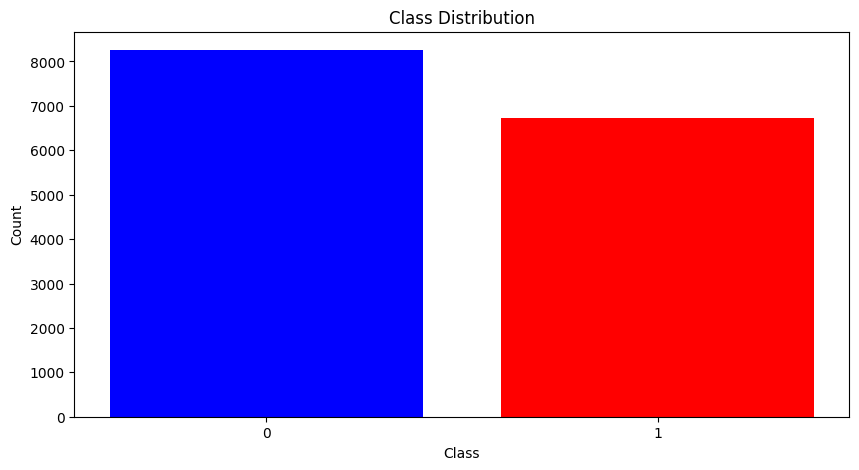

In [10]:
# Checking balance of the dataset
df['eyeDetection'].value_counts()
plt.figure(figsize = (10,5))
plt.bar(df['eyeDetection'].unique(), df['eyeDetection'].value_counts(), color = ['blue', 'red'])
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [11]:
# Splitting the data into training and testing data
ds = df.copy()
X = ds.drop('eyeDetection',axis=1)
y = ds['eyeDetection']

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

In [12]:
# Applying PCA
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [13]:
print(X_scaled.shape,y.shape)

(14980, 14) (14980,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12733, 14) (12733,)
(2247, 14) (2247,)


In [16]:
x_train = np.array(x_train).reshape(-1,14,1)
x_test = np.array(x_test).reshape(-1,14,1)

print(x_train.shape, x_test.shape)

(12733, 14, 1) (2247, 14, 1)


## LSTM Model Architecture

In [68]:
input_shape = tf.keras.Input(shape= (x_train.shape[1], x_train.shape[2]))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(input_shape)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_2=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_2)

flatten = Flatten()(drop2)

Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(flatten)

outputs = Dense(1, activation = 'sigmoid')(Dense2)

model = Model(inputs = input_shape, outputs = outputs)

In [69]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 14, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 14, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 14, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 14, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       458,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,772,929 (6.76 MB)

 Trainable params: 1,772,929 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        # saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [71]:
model,history = train_model(model, x_train, y_train,x_test, y_test, save_to= './', epoch = 100) 

Epoch 1/100


635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5450 - loss: 0.9076
Epoch 1: val_accuracy improved from -inf to 0.51758, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5450 - loss: 0.9068 - val_accuracy: 0.5176 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 2/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5751 - loss: 0.6816
Epoch 2: val_accuracy improved from 0.51758 to 0.57632, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5752 - loss: 0.6817 - val_accuracy: 0.5763 - val_loss: 0.6845 - learning_rate: 9.0484e-04
Epoch 3/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5843 - loss: 0.6762
Epoch 3: val_accuracy improved from 0.57632 to 0.61282, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5843 - loss: 0.6761 - val_accuracy: 0.6128 - val_loss: 0.6705 - learning_rate: 8.1873e-04
Epoch 4/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5932 - loss: 0.6682
Epoch 4: val_accuracy did not improve from 0.61282
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5933 - loss: 0.6681 - val_accuracy: 0.5955 - val_loss: 0.6693 - learning_rate: 7.4082e-04
Epoch 5/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6041 - loss: 0.6641
Epoch 5: val_accuracy did not improve from 0.61282
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6041 - loss: 0.6641 - val_accuracy: 0.6044 - val_loss: 0.6640 - learning_rate: 6.7032e-04
Epoch 6/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6001 - loss: 0.6545
Epoch 6: val_accuracy did not improve from 0.61282
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6001 - loss: 0.6545 - val_accuracy: 0.6044 - val_loss: 0.6489 - learning_rate: 6.0653

637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6279 - loss: 0.6351 - val_accuracy: 0.6306 - val_loss: 0.6383 - learning_rate: 5.4881e-04
Epoch 8/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6335 - loss: 0.6317
Epoch 8: val_accuracy improved from 0.63062 to 0.65910, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6335 - loss: 0.6317 - val_accuracy: 0.6591 - val_loss: 0.6183 - learning_rate: 4.9659e-04
Epoch 9/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6517 - loss: 0.6130
Epoch 9: val_accuracy did not improve from 0.65910
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6517 - loss: 0.6130 - val_accuracy: 0.6520 - val_loss: 0.6186 - learning_rate: 4.4933e-04
Epoch 10/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6566 - loss: 0.6059
Epoch 10: val_accuracy improved from 0.65910 to 0.67423, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6566 - loss: 0.6059 - val_accuracy: 0.6742 - val_loss: 0.5953 - learning_rate: 4.0657e-04
Epoch 11/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6788 - loss: 0.5885
Epoch 11: val_accuracy improved from 0.67423 to 0.68002, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6788 - loss: 0.5885 - val_accuracy: 0.6800 - val_loss: 0.5722 - learning_rate: 3.6788e-04
Epoch 12/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6881 - loss: 0.5752
Epoch 12: val_accuracy improved from 0.68002 to 0.70939, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6881 - loss: 0.5752 - val_accuracy: 0.7094 - val_loss: 0.5692 - learning_rate: 3.3287e-04
Epoch 13/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7155 - loss: 0.5474
Epoch 13: val_accuracy improved from 0.70939 to 0.72363, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7155 - loss: 0.5474 - val_accuracy: 0.7236 - val_loss: 0.5484 - learning_rate: 3.0119e-04
Epoch 14/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7311 - loss: 0.5301
Epoch 14: val_accuracy improved from 0.72363 to 0.72897, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7311 - loss: 0.5301 - val_accuracy: 0.7290 - val_loss: 0.5392 - learning_rate: 2.7253e-04
Epoch 15/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7401 - loss: 0.5154
Epoch 15: val_accuracy improved from 0.72897 to 0.73654, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7402 - loss: 0.5153 - val_accuracy: 0.7365 - val_loss: 0.5138 - learning_rate: 2.4660e-04
Epoch 16/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7520 - loss: 0.4999
Epoch 16: val_accuracy improved from 0.73654 to 0.74722, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7520 - loss: 0.4999 - val_accuracy: 0.7472 - val_loss: 0.5026 - learning_rate: 2.2313e-04
Epoch 17/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7549 - loss: 0.4893
Epoch 17: val_accuracy improved from 0.74722 to 0.75167, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7549 - loss: 0.4893 - val_accuracy: 0.7517 - val_loss: 0.4937 - learning_rate: 2.0190e-04
Epoch 18/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7660 - loss: 0.4756
Epoch 18: val_accuracy improved from 0.75167 to 0.75701, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7660 - loss: 0.4756 - val_accuracy: 0.7570 - val_loss: 0.4866 - learning_rate: 1.8268e-04
Epoch 19/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7742 - loss: 0.4665
Epoch 19: val_accuracy improved from 0.75701 to 0.76101, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7742 - loss: 0.4665 - val_accuracy: 0.7610 - val_loss: 0.4776 - learning_rate: 1.6530e-04
Epoch 20/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7701 - loss: 0.4629
Epoch 20: val_accuracy improved from 0.76101 to 0.76190, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7701 - loss: 0.4629 - val_accuracy: 0.7619 - val_loss: 0.4673 - learning_rate: 1.4957e-04
Epoch 21/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7786 - loss: 0.4523
Epoch 21: val_accuracy improved from 0.76190 to 0.76235, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7786 - loss: 0.4523 - val_accuracy: 0.7623 - val_loss: 0.4622 - learning_rate: 1.3534e-04
Epoch 22/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7834 - loss: 0.4458
Epoch 22: val_accuracy improved from 0.76235 to 0.76814, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7834 - loss: 0.4458 - val_accuracy: 0.7681 - val_loss: 0.4590 - learning_rate: 1.2246e-04
Epoch 23/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7926 - loss: 0.4319
Epoch 23: val_accuracy did not improve from 0.76814
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7926 - loss: 0.4320 - val_accuracy: 0.7672 - val_loss: 0.4562 - learning_rate: 1.1080e-04
Epoch 24/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7921 - loss: 0.4316
Epoch 24: val_accuracy did not improve from 0.76814
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7921 - loss: 0.4316 - val_accuracy: 0.7592 - val_loss: 0.4602 - learning_rate: 1.0026e-04
Epoch 25/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7980 - loss: 0.4240
Epoch 25: val_accuracy improved from 0.76814 to 0.76858, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7980 - loss: 0.4240 - val_accuracy: 0.7686 - val_loss: 0.4560 - learning_rate: 9.0718e-05
Epoch 26/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8005 - loss: 0.4197
Epoch 26: val_accuracy improved from 0.76858 to 0.77170, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8005 - loss: 0.4197 - val_accuracy: 0.7717 - val_loss: 0.4465 - learning_rate: 8.2085e-05
Epoch 27/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8025 - loss: 0.4181
Epoch 27: val_accuracy improved from 0.77170 to 0.77303, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8025 - loss: 0.4181 - val_accuracy: 0.7730 - val_loss: 0.4480 - learning_rate: 7.4274e-05
Epoch 28/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8126 - loss: 0.4087
Epoch 28: val_accuracy improved from 0.77303 to 0.77570, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8126 - loss: 0.4087 - val_accuracy: 0.7757 - val_loss: 0.4418 - learning_rate: 6.7206e-05
Epoch 29/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8065 - loss: 0.4080
Epoch 29: val_accuracy did not improve from 0.77570
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8065 - loss: 0.4080 - val_accuracy: 0.7721 - val_loss: 0.4541 - learning_rate: 6.0810e-05
Epoch 30/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8174 - loss: 0.4028
Epoch 30: val_accuracy did not improve from 0.77570
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8174 - loss: 0.4028 - val_accuracy: 0.7730 - val_loss: 0.4395 - learning_rate: 5.5023e-05
Epoch 31/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8167 - loss: 0.3983
Epoch 31: val_accuracy improved from 0.77570 to 0.77793, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8167 - loss: 0.3983 - val_accuracy: 0.7779 - val_loss: 0.4389 - learning_rate: 4.9787e-05
Epoch 32/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8141 - loss: 0.3994
Epoch 32: val_accuracy improved from 0.77793 to 0.77926, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8141 - loss: 0.3994 - val_accuracy: 0.7793 - val_loss: 0.4413 - learning_rate: 4.5049e-05
Epoch 33/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8170 - loss: 0.3995
Epoch 33: val_accuracy improved from 0.77926 to 0.78371, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8169 - loss: 0.3995 - val_accuracy: 0.7837 - val_loss: 0.4366 - learning_rate: 4.0762e-05
Epoch 34/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8247 - loss: 0.3926
Epoch 34: val_accuracy did not improve from 0.78371
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8246 - loss: 0.3926 - val_accuracy: 0.7802 - val_loss: 0.4347 - learning_rate: 3.6883e-05
Epoch 35/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8191 - loss: 0.3926
Epoch 35: val_accuracy did not improve from 0.78371
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8191 - loss: 0.3926 - val_accuracy: 0.7802 - val_loss: 0.4400 - learning_rate: 3.3373e-05
Epoch 36/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8211 - loss: 0.3912
Epoch 36: val_accuracy improved from 0.78371 to 0.78594, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8211 - loss: 0.3912 - val_accuracy: 0.7859 - val_loss: 0.4354 - learning_rate: 3.0197e-05
Epoch 37/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8197 - loss: 0.3877
Epoch 37: val_accuracy improved from 0.78594 to 0.78816, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8196 - loss: 0.3877 - val_accuracy: 0.7882 - val_loss: 0.4328 - learning_rate: 2.7324e-05
Epoch 38/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8202 - loss: 0.3833
Epoch 38: val_accuracy did not improve from 0.78816
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8202 - loss: 0.3833 - val_accuracy: 0.7859 - val_loss: 0.4342 - learning_rate: 2.4724e-05
Epoch 39/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8277 - loss: 0.3761
Epoch 39: val_accuracy did not improve from 0.78816
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8277 - loss: 0.3761 - val_accuracy: 0.7864 - val_loss: 0.4309 - learning_rate: 2.2371e-05
Epoch 40/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8252 - loss: 0.3849
Epoch 40: val_accuracy did not improve from 0.78816
637/637 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8252 - loss: 0.3849 - val_accuracy: 0.7882 - val_loss: 0.4311 - learning_rate: 

637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8365 - loss: 0.3744 - val_accuracy: 0.7899 - val_loss: 0.4293 - learning_rate: 1.8316e-05
Epoch 42/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8330 - loss: 0.3733
Epoch 42: val_accuracy did not improve from 0.78994
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8330 - loss: 0.3733 - val_accuracy: 0.7859 - val_loss: 0.4323 - learning_rate: 1.6573e-05
Epoch 43/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8325 - loss: 0.3749
Epoch 43: val_accuracy did not improve from 0.78994
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8325 - loss: 0.3750 - val_accuracy: 0.7877 - val_loss: 0.4299 - learning_rate: 1.4996e-05
Epoch 44/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8286 - loss: 0.3768
Epoch 44: val_accuracy improved from 0.78994 to 0.79217, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8285 - loss: 0.3768 - val_accuracy: 0.7922 - val_loss: 0.4300 - learning_rate: 1.3569e-05
Epoch 45/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8279 - loss: 0.3799
Epoch 45: val_accuracy improved from 0.79217 to 0.79350, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8279 - loss: 0.3799 - val_accuracy: 0.7935 - val_loss: 0.4271 - learning_rate: 1.2277e-05
Epoch 46/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8282 - loss: 0.3748
Epoch 46: val_accuracy did not improve from 0.79350
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8281 - loss: 0.3748 - val_accuracy: 0.7913 - val_loss: 0.4285 - learning_rate: 1.1109e-05
Epoch 47/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8275 - loss: 0.3749
Epoch 47: val_accuracy improved from 0.79350 to 0.79439, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8275 - loss: 0.3749 - val_accuracy: 0.7944 - val_loss: 0.4281 - learning_rate: 1.0052e-05
Epoch 48/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8266 - loss: 0.3806
Epoch 48: val_accuracy did not improve from 0.79439
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8266 - loss: 0.3806 - val_accuracy: 0.7917 - val_loss: 0.4292 - learning_rate: 9.0953e-06
Epoch 49/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8277 - loss: 0.3831
Epoch 49: val_accuracy did not improve from 0.79439
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8277 - loss: 0.3831 - val_accuracy: 0.7944 - val_loss: 0.4260 - learning_rate: 8.2297e-06
Epoch 50/100
635/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8282 - loss: 0.3750
Epoch 50: val_accuracy improved from 0.79439 to 0.79484, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8282 - loss: 0.3750 - val_accuracy: 0.7948 - val_loss: 0.4265 - learning_rate: 7.4466e-06
Epoch 51/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8333 - loss: 0.3746
Epoch 51: val_accuracy improved from 0.79484 to 0.79840, saving model to ./_best_model.h5


637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8333 - loss: 0.3746 - val_accuracy: 0.7984 - val_loss: 0.4262 - learning_rate: 6.7379e-06
Epoch 52/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8278 - loss: 0.3770
Epoch 52: val_accuracy did not improve from 0.79840
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8278 - loss: 0.3770 - val_accuracy: 0.7948 - val_loss: 0.4275 - learning_rate: 6.0967e-06
Epoch 53/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8261 - loss: 0.3788
Epoch 53: val_accuracy did not improve from 0.79840
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8261 - loss: 0.3788 - val_accuracy: 0.7953 - val_loss: 0.4270 - learning_rate: 5.5166e-06
Epoch 54/100
636/637 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8322 - loss: 0.3674
Epoch 54: val_accuracy did not improve from 0.79840
637/637 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8322 - loss: 0.3674 - val_accuracy: 0.7926 - val_loss: 0.4271 - learning_rate: 

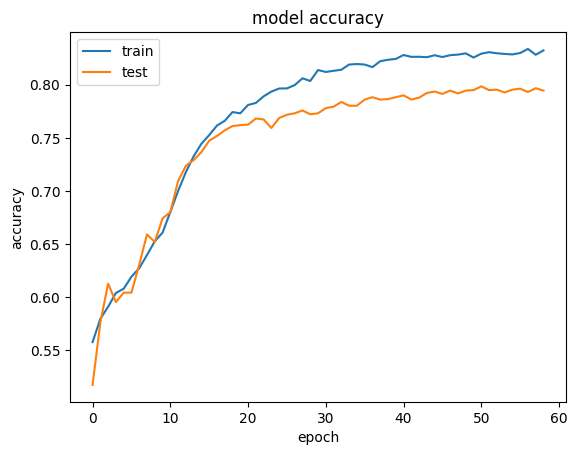

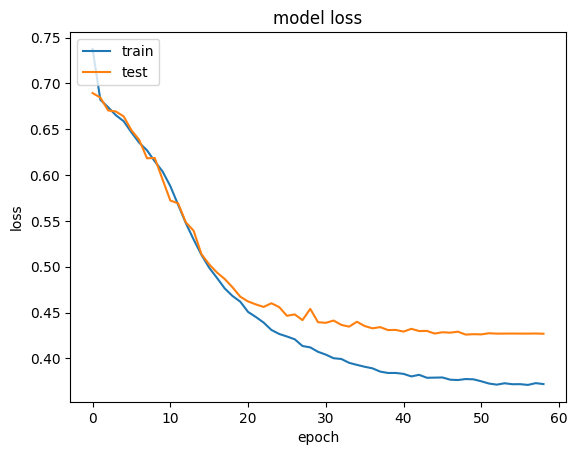

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7973 - loss: 0.4299
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


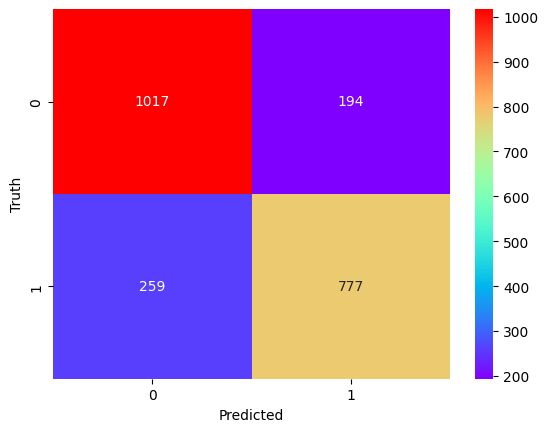

In [19]:
# Load saved model for testing
saved_model = load_model('./_best_model.h5')
saved_model.evaluate(x_test, y_test)

# Testing the model
y_pred = saved_model.predict(x_test)
y_pred = np.round(y_pred)
print(y_pred)  

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True, cmap='rainbow', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()